Chapter 12, 三维可视化
# 常用四种三维可视化方案
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

## 散点

In [2]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import plotly.io as pio
pio.kaleido.scope.default_format = "svg"
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### Matplotlib

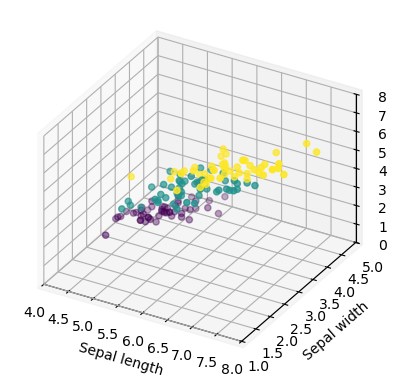

In [4]:
# 加载鸢尾花数据集
iris = datasets.load_iris()

# 取出前三个特征作为横纵坐标和高度
X = iris.data[:, :3]
y = iris.target

# 创建3D图像对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

# 设置坐标轴标签
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

# 设置坐标轴取值范围
ax.set_xlim(4,8)
ax.set_ylim(1,5)
ax.set_zlim(0,8)

# 设置正交投影
ax.set_proj_type('ortho')
# 显示图像
plt.show()

fig.savefig('Figures\Matplotlib绘制三维散点图，加标签.svg', format='svg')

### Plotly

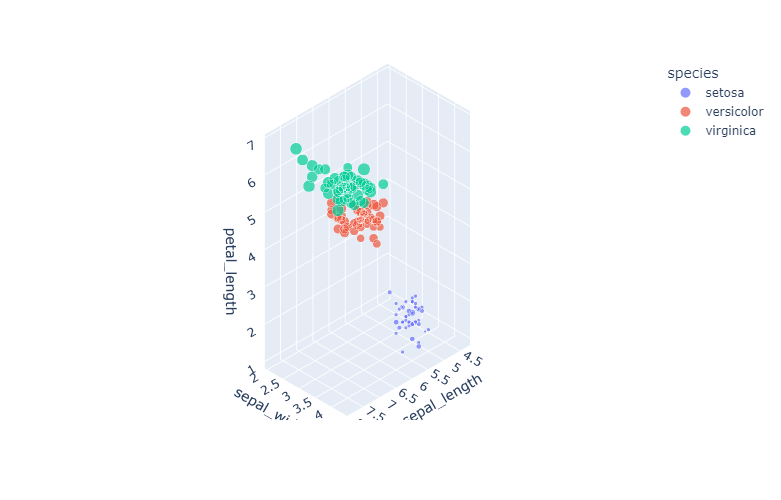

In [15]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, 
                    x='sepal_length', 
                    y='sepal_width', 
                    z='petal_length',
                    size = 'petal_width',
                    color='species')

fig.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

# 将fig保存为SVG格式
fig.write_image("Figures\Plotly绘制样本数据散点图，加标签.svg")
fig.write_image("Figures\Plotly绘制样本数据散点图，加标签.pdf")

## 线图

### Matplotlib

In [6]:
# 生成随机游走数据
num_steps = 300
t = np.arange(num_steps)
x = np.cumsum(np.random.standard_normal(num_steps))
# 生成第一个随机数序列，并累加
y = np.cumsum(np.random.standard_normal(num_steps))
# 生成第二个随机数序列，并累加
z = np.cumsum(np.random.standard_normal(num_steps))
# 生成第三个随机数序列，并累加

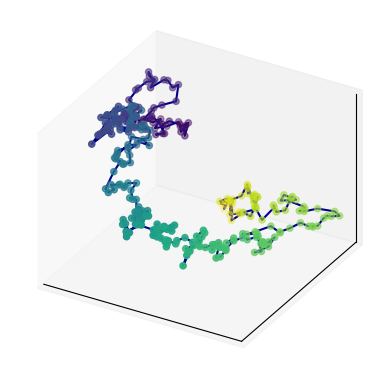

In [7]:

# 绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x,y,z,color = 'darkblue')
ax.scatter(x,y,z,c = t, cmap = 'viridis')


ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# 设置正交投影
ax.set_proj_type('ortho')

# 设置相机视角
# ax.view_init(elev = 30, azim = 120)

# 显示图像
plt.show()

fig.savefig('Figures\Matplotlib绘制三维线图.svg', format='svg')

### Plotly

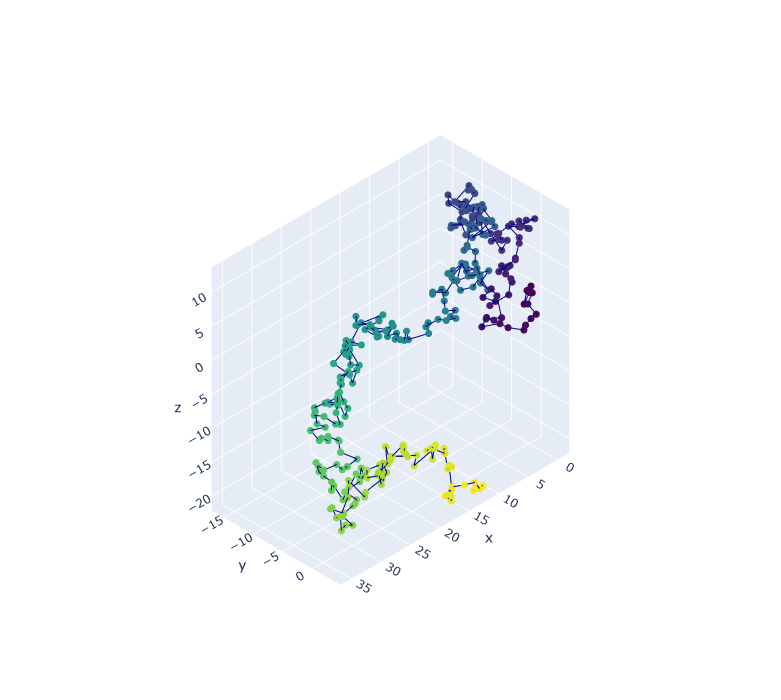

In [8]:
import plotly.graph_objects as go  # 导入绘图库plotly

fig = go.Figure(data=go.Scatter3d(
    x=x, y=y, z=z,  # 设置x、y、z轴数据
    marker=dict(
        size=4,
        color=t,
        colorscale='Viridis',  # 设置颜色渐变色标尺
    ),
    line=dict(
        color='darkblue',
        width=2
    )
))

fig.layout.scene.camera.projection.type = "orthographic"

fig.update_layout(
    width=800,
    height=700)

# 将fig保存为SVG格式
fig.write_image("Figures\Plotly绘制三维线图.svg")
fig.show()  # 显示绘图结果

## 曲面

In [9]:
# 生成曲面数据
x1_array = np.linspace(-3,3,121)
x2_array = np.linspace(-3,3,121)

xx1, xx2 = np.meshgrid(x1_array, x2_array)

ff = xx1 * np.exp(- xx1**2 - xx2 **2)

### Matplotlib

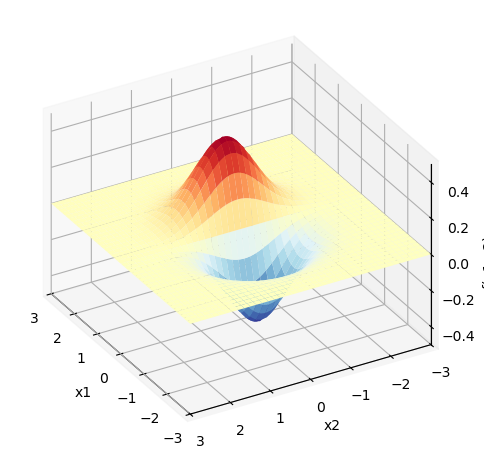

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx1, xx2, ff, cmap='RdYlBu_r')

# 设置坐标轴标签
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')

# 设置坐标轴取值范围
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-0.5,0.5)

# 设置正交投影
ax.set_proj_type('ortho')

# 设置相机视角
ax.view_init(elev = 30, azim = 150)

plt.tight_layout()

plt.show()

fig.savefig('Figures\Matplotlib绘制网格曲面.svg', format='svg')

### Plotly

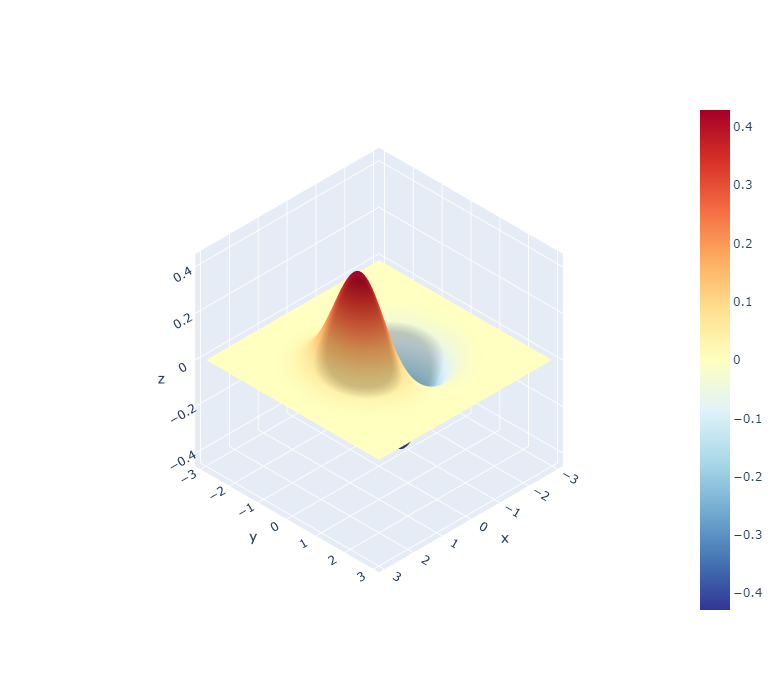

In [11]:
fig = go.Figure(data=[go.Surface(z=ff, x=xx1, y=xx2, colorscale='RdYlBu_r')])

fig.layout.scene.camera.projection.type = "orthographic"

fig.update_layout(
    width=800,
    height=700)

# 将fig保存为SVG格式
fig.write_image("Figures\Plotly绘制曲面.svg")
fig.show()  # 显示绘图结果

## 空间等高线

### Matplotlib

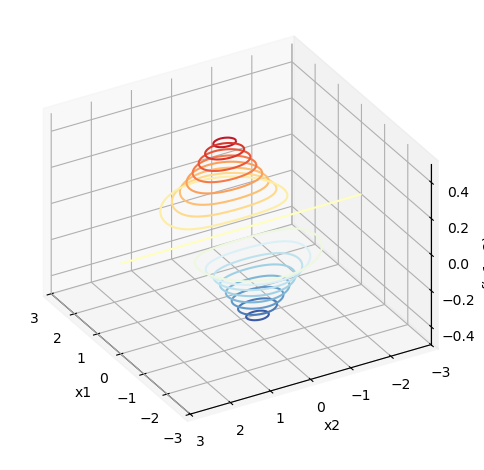

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.contour(xx1, xx2, ff, cmap='RdYlBu_r', levels = 20)

# 设置坐标轴标签
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')

# 设置坐标轴取值范围
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-0.5,0.5)

# 设置正交投影
ax.set_proj_type('ortho')

# 设置相机视角
ax.view_init(elev = 30, azim = 150)

plt.tight_layout()

plt.show()

fig.savefig('Figures\Matplotlib绘制三维等高线.svg', format='svg')

### Plotly

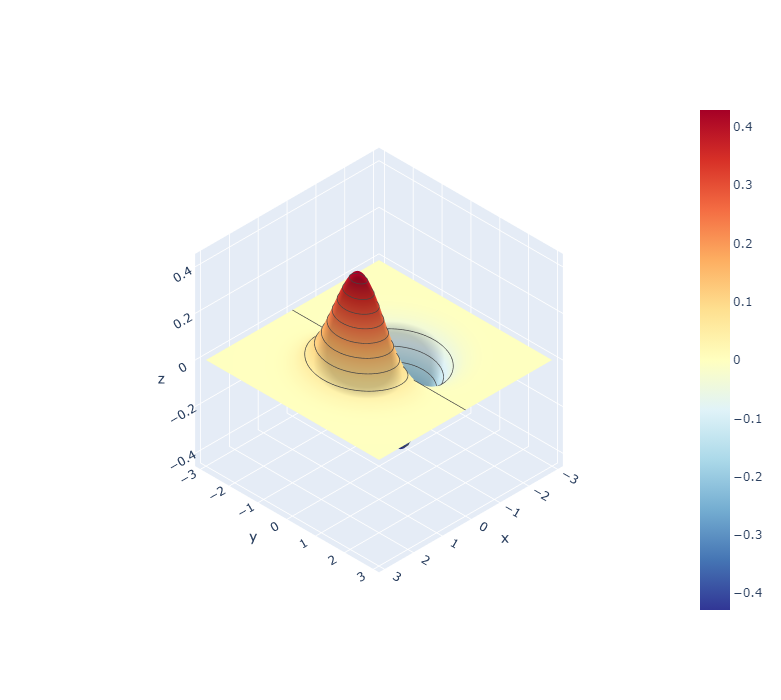

In [13]:
fig = go.Figure(data=[go.Surface(z=ff, x=xx1, y=xx2, colorscale='RdYlBu_r',
                                    contours = {"z": {"show": True, "start": -0.5, "end": 0.5, "size": 0.05}})])

fig.layout.scene.camera.projection.type = "orthographic"

fig.update_layout(
    width=800,
    height=700)
# 将fig保存为SVG格式
fig.write_image("Figures\Plotly绘制三维等高线.svg")
fig.show()  # 显示绘图结果

In [14]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023